##0.임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf

##1.데이터가져오기

In [2]:
!gdown https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5

Downloading...
From (original): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5
From (redirected): https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5&confirm=t&uuid=31962e11-c3ef-4985-9efb-260929e86548
To: /content/PlantVillage.zip
100% 345M/345M [00:02<00:00, 140MB/s]


In [3]:
!unzip -q '/content/PlantVillage.zip'

In [4]:
root_dir = 'PlantVillage'
Potato_Early_blight = root_dir + '/Potato___Early_blight/'
Potato_Late_blight = root_dir + '/Potato___Late_blight/'
Potato_healthy = root_dir + '/Potato___healthy/'

###이미지 로딩

In [5]:
class_name = ['Early_blight', 'Late_blight', 'healthy']

In [6]:
import os
Potato_Early_blight_fname = os.listdir(Potato_Early_blight)
Potato_Late_blight_fname = os.listdir(Potato_Late_blight)
Potato_Leaf_blight_fname = os.listdir(Potato_healthy)

In [7]:
import PIL

Potato_Early_blight_image = []
Potato_Early_blight_label = []

# 해당 폴더에 있는 이미지를 읽어서 가져옴
for fname in Potato_Early_blight_fname:
  Image = PIL.Image.open(Potato_Early_blight + fname)
  # 실습에서는 크기 고려해서 맞추지 않고 일반적인 사이즈인 224를 사용
  Image = Image.resize((224,224))
  arr = np.array(Image)
  Potato_Early_blight_image.append(arr)
  Potato_Early_blight_label.append(2)

In [8]:
import PIL

Potato_Late_blight_image = []
Potato_Late_blight_label = []

# 해당 폴더에 있는 이미지를 읽어서 가져옴
for fname in Potato_Late_blight_fname:
  Image = PIL.Image.open(Potato_Late_blight + fname)
  # 실습에서는 크기 고려해서 맞추지 않고 일반적인 사이즈인 224를 사용
  Image = Image.resize((224,224))
  arr = np.array(Image)
  Potato_Late_blight_image.append(arr)
  Potato_Late_blight_label.append(1)

In [9]:
import PIL

Potato_healthy_image = []
Potato_healthy_label = []

# 해당 폴더에 있는 이미지를 읽어서 가져옴
for fname in Potato_Leaf_blight_fname:
  Image = PIL.Image.open(Potato_healthy + fname)
  # 실습에서는 크기 고려해서 맞추지 않고 일반적인 사이즈인 224를 사용
  Image = Image.resize((224,224))
  arr = np.array(Image)
  Potato_healthy_image.append(arr)
  Potato_healthy_label.append(0)

In [10]:
len(Potato_Early_blight_image), len(Potato_Early_blight_label)

(1000, 1000)

In [11]:
len(Potato_Late_blight_image), len(Potato_Late_blight_label)

(1000, 1000)

In [12]:
len(Potato_healthy_image), len(Potato_healthy_label)

(152, 152)

In [13]:
X = Potato_Early_blight_image + Potato_Late_blight_image + Potato_healthy_image
y = Potato_Early_blight_label + Potato_Late_blight_label + Potato_healthy_label

In [14]:
# nPotato_Early_blight_image = np.array(Potato_Early_blight_image)
# Potato_Early_blight_label = np.array(Potato_Early_blight_label)

# Potato_Late_blight_image = np.array(Potato_Late_blight_image)
# Potato_Late_blight_label = np.array(Potato_Late_blight_label)

# Potato_healthy_image = np.array(Potato_healthy_image)
# Potato_healthy_label = np.array(Potato_healthy_label)

X = np.array(X)
y = np.array(y)

##2.데이터 분리

In [15]:
from sklearn.model_selection import train_test_split

XX_train, X_val, yy_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
XX_train.shape, yy_train.shape

((1721, 224, 224, 3), (1721,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(XX_train, yy_train, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1376, 224, 224, 3), (431, 224, 224, 3), (1376,), (431,))

In [19]:
samples = np.random.randint(2000, size=25)
samples

array([  64,  244,  336,  441, 1160, 1301,  115,  814, 1860, 1823, 1058,
       1535, 1413,  740,  803, 1113, 1505, 1437,  139,  780, 1149,  642,
       1583,  100,   99])

IndexError: index 1860 is out of bounds for axis 0 with size 1376

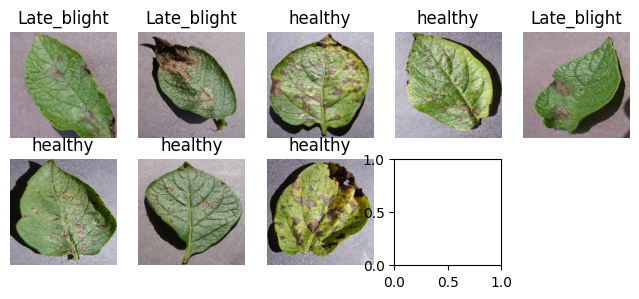

In [20]:
# fig = plt.figure(figsize=(8,8))
# for i, idx in enumerate(samples):
#   # 한줄에 5개씩 5줄
#   plt.subplot(5,5,i+1)
#   plt.imshow(X_train[idx], cmap="gray")
#   plt.axis('off')
#   plt.title(class_name[y_train[idx]])a
# plt.tight_layout()
# plt.show()

###스케일링

In [21]:
X_train_s = X_train/255.
X_val_s = X_val/255.

###인코딩

In [22]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [23]:
type(X_train_s), type(y_train_o)

(numpy.ndarray, numpy.ndarray)

In [24]:
X_train_s.shape, y_train_o.shape

((1376, 224, 224, 3), (1376, 3))

##3.모델 만들기

In [25]:
# 있는 모델 가져다 쓰기

from keras.applications import VGG16

base_model = VGG16(
    input_shape=(224,224,3),
    # 어떤 가중치, 어떤 학습이 된 모델을 가져오겠냐?
    weights='imagenet',
    # 앞단 뒷단 전체 다 가져올 것인가?
    include_top=False)

base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 새로 학습 시키지는 않는다
base_model.trainable = False
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
from keras import layers

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])

In [28]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [29]:
# early stopping 콜백함수 설정
from keras.callbacks import EarlyStopping

es = EarlyStopping(
    # 뭐를 살펴볼건가
    monitor = "val_loss",
    # 얼마나 참고 볼건가
    patience=5
)

In [30]:
epochs = 3
batch_size = 32

histroy = model.fit(X_train_s, y_train_o,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_val_s, y_val_o),
                    # 한번 돌고 확인하고
                    callbacks=[es])

Epoch 1/3
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 674ms/step - acc: 0.7089 - loss: 1.4481 - val_acc: 0.9397 - val_loss: 0.1837
Epoch 2/3
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - acc: 0.9705 - loss: 0.0836 - val_acc: 0.9165 - val_loss: 0.1939
Epoch 3/3
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - acc: 0.9777 - loss: 0.0624 - val_acc: 0.9582 - val_loss: 0.1215


In [31]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'], label='train_loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
  plt.title('Loss Curve')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='train_acc')
  plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
  plt.title('acc Curve')
  plt.legend()

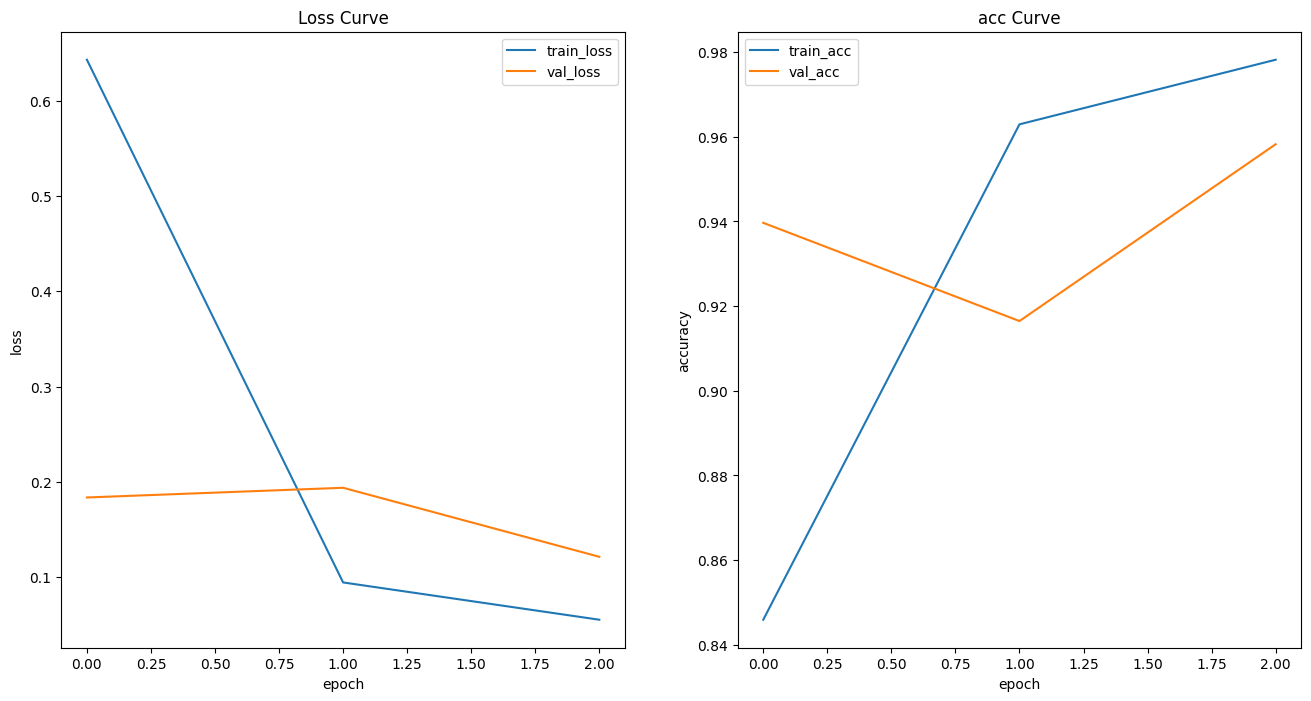

In [32]:
plot_history(histroy)

##4.테스트

In [33]:
X_test_s = X_test/255.

In [34]:
y_test_o = to_categorical(y_test)

In [42]:
y_pred = model.predict(X_test_s)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step


In [43]:
y_test_o = np.argmax(y_test_o, axis=1)
y_test_o

AxisError: axis 1 is out of bounds for array of dimension 1

In [44]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1,

In [45]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 0.9681159420289855
recall: 0.8912
precision: 0.9779
f1: 0.925


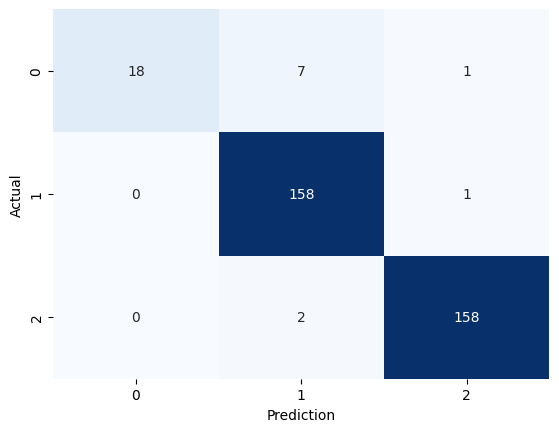

In [46]:
print_metrics(y_test_o, y_pred)